In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import zipfile

zip_file_path = '/content/drive/My Drive/archive (3).zip'
extract_path = '/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
pip install glob

ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


In [3]:
pip install seaborn

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import glob
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
import seaborn as sns
from sklearn import metrics

In [5]:
tf.keras.backend.clear_session() #clean session


In [6]:
main_path = '/real_vs_fake/real-vs-fake'

train_dir = os.path.join(main_path, 'train')
valid_dir = os.path.join(main_path, 'valid')
test_dir = os.path.join(main_path, 'test')

In [7]:
print("Train_dir Subfolders: ", os.listdir(train_dir))
print("Valid_dir Subfolders: ", os.listdir(valid_dir))
print("Test_dir Subfolders: ", os.listdir(test_dir))

Train_dir Subfolders:  ['fake', 'real']
Valid_dir Subfolders:  ['fake', 'real']
Test_dir Subfolders:  ['fake', 'real']


In [8]:
images_df = {
    "folder":[],
    "image_path":[],
    "label":[]
}

for folder in os.listdir(main_path): #iterate on each train, valid and test folder
    for label in os.listdir(main_path + "/" + folder): #iterate on fake and real folders (labels)
        for img in glob.glob(main_path + "/" + folder + "/" + label + "/*.jpg"):
            images_df["folder"].append(folder)
            images_df["image_path"].append(img)
            images_df["label"].append(label)

In [9]:
images_df = pd.DataFrame(images_df)


In [10]:
images_df


folder                                         image_path label
0       train  /real_vs_fake/real-vs-fake/train/fake/Q0TOMOIF...  fake
1       train  /real_vs_fake/real-vs-fake/train/fake/QPO06EG9...  fake
2       train  /real_vs_fake/real-vs-fake/train/fake/NN19EZKF...  fake
3       train  /real_vs_fake/real-vs-fake/train/fake/R8FZS1IW...  fake
4       train  /real_vs_fake/real-vs-fake/train/fake/68E03REI...  fake
...       ...                                                ...   ...
139995   test     /real_vs_fake/real-vs-fake/test/real/28467.jpg  real
139996   test     /real_vs_fake/real-vs-fake/test/real/13854.jpg  real
139997   test     /real_vs_fake/real-vs-fake/test/real/16746.jpg  real
139998   test     /real_vs_fake/real-vs-fake/test/real/04757.jpg  real
139999   test     /real_vs_fake/real-vs-fake/test/real/28032.jpg  real

[140000 rows x 3 columns]

In [11]:
real_grouped_df = images_df[images_df['label'] == "real"].groupby('folder')
fake_grouped_df = images_df[images_df['label'] == "fake"].groupby('folder')

In [12]:
real_grouped_df.size()


folder
test     10000
train    50000
valid    10000
dtype: int64

In [13]:
fake_grouped_df.size()


folder
test     10000
train    50000
valid    10000
dtype: int64

In [14]:
image_train_gen = tf.keras.preprocessing.image.ImageDataGenerator(
                                  rescale=1./255.,
                                  horizontal_flip=True,
                                  )

image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)

In [15]:
train_ds = image_train_gen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
)

valid_ds = image_gen.flow_from_directory(
    valid_dir,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary'
)

test_ds = image_gen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary',
    shuffle=False) #shuffle disabled

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [16]:
def plot_images(img, label):
    plt.figure(figsize=[12, 12])
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(img[i])
        plt.axis('off')
        if label[i] == 0:
            plt.title("Fake")
        else:
            plt.title("Real")

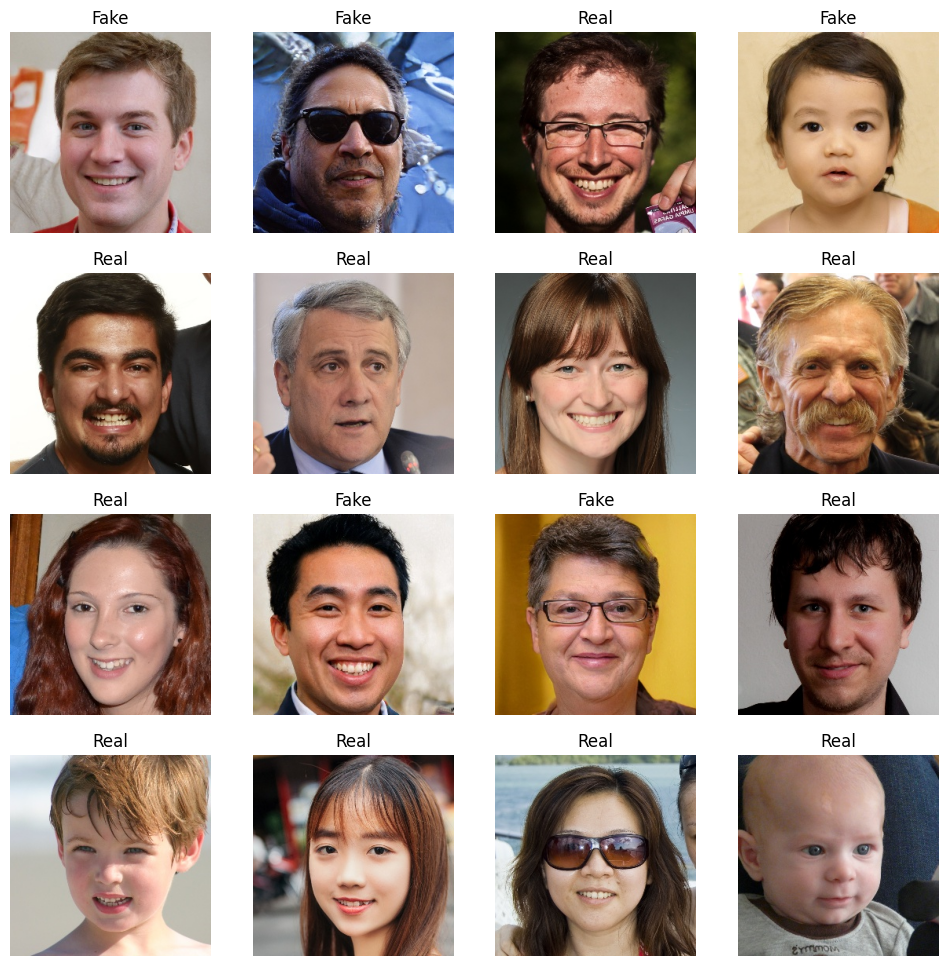

In [17]:
img,lbl = next(train_ds)
plot_images(img,lbl)

In [18]:
for img, label in train_ds:
    print("Values: ", img[0])
    print("Label: ", label[0])
    break

Values:  [[[0.37254903 0.3647059  0.30588236]
  [0.34509805 0.3372549  0.2784314 ]
  [0.32156864 0.3137255  0.2627451 ]
  ...
  [0.02352941 0.02352941 0.02352941]
  [0.02745098 0.02745098 0.02745098]
  [0.02745098 0.02745098 0.02745098]]

 [[0.39607847 0.38823533 0.32941177]
  [0.3647059  0.35686275 0.29803923]
  [0.3372549  0.32941177 0.27058825]
  ...
  [0.02745098 0.02745098 0.02745098]
  [0.02745098 0.02745098 0.02745098]
  [0.02745098 0.02745098 0.02745098]]

 [[0.42352945 0.41176474 0.34509805]
  [0.38823533 0.37647063 0.31764707]
  [0.34901962 0.34117648 0.28235295]
  ...
  [0.02745098 0.02745098 0.02745098]
  [0.02352941 0.02352941 0.02352941]
  [0.02352941 0.02352941 0.02352941]]

 ...

 [[0.05490196 0.05490196 0.01568628]
  [0.05882353 0.05882353 0.02745098]
  [0.04705883 0.04705883 0.01568628]
  ...
  [0.1137255  0.10980393 0.09019608]
  [0.12941177 0.1254902  0.10588236]
  [0.11764707 0.1137255  0.09411766]]

 [[0.05490196 0.0509804  0.03529412]
  [0.06666667 0.0627451  0.0

In [19]:
for img, label in train_ds:
    print(img.shape)
    print(label.shape)
    break

(64, 256, 256, 3)
(64,)


In [20]:
train_ds.class_indices


{'fake': 0, 'real': 1}

In [21]:
input_shape = (256, 256, 3) #define the input shape of our data


In [22]:
def get_model(input_shape):

    input = tf.keras.Input(shape=input_shape)

    densenet = tf.keras.applications.DenseNet121( weights="imagenet", include_top=False, input_tensor = input)

    x = tf.keras.layers.GlobalAveragePooling2D()(densenet.output)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(x) #binary classification

    model = tf.keras.Model(densenet.input, output)

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    return model

In [23]:
model_ft = get_model(input_shape)

model_ft.summary()

29084464/29084464 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 262, 262, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 128, 128, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  

In [ ]:
tf.keras.utils.plot_model(model_ft, show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [24]:
checkpoint_filepath = "model_cp.h5"

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min', #minimize the loss value
    save_best_only=True)

In [25]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                     patience=5,
                                                     restore_best_weights=True,
                                                    )

In [26]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.2,
                                                 patience=3)

In [27]:
history_ft = model_ft.fit(train_ds,
                       epochs = 5,
                       validation_data = valid_ds,
                       callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr])

Epoch 1/5
1563/1563 [==============================] - 1398s 894ms/step - loss: 0.1002 - accuracy: 0.9612 - val_loss: 0.2104 - val_accuracy: 0.9162 - lr: 0.0010
Epoch 2/5
1563/1563 [==============================] - 1395s 892ms/step - loss: 0.0514 - accuracy: 0.9810 - val_loss: 0.2869 - val_accuracy: 0.8870 - lr: 0.0010
Epoch 3/5
1563/1563 [==============================] - 1384s 886ms/step - loss: 0.0402 - accuracy: 0.9851 - val_loss: 0.0607 - val_accuracy: 0.9784 - lr: 0.0010
Epoch 4/5
1563/1563 [==============================] - 1385s 886ms/step - loss: 0.0353 - accuracy: 0.9874 - val_loss: 1.0766 - val_accuracy: 0.6840 - lr: 0.0010
Epoch 5/5
1563/1563 [==============================] - 1394s 892ms/step - loss: 0.0280 - accuracy: 0.9897 - val_loss: 0.1865 - val_accuracy: 0.9339 - lr: 0.0010


In [28]:
model_ft.save("my_model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [30]:
model_ft.save("/content/drive/My Drive/my_modelCNN.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


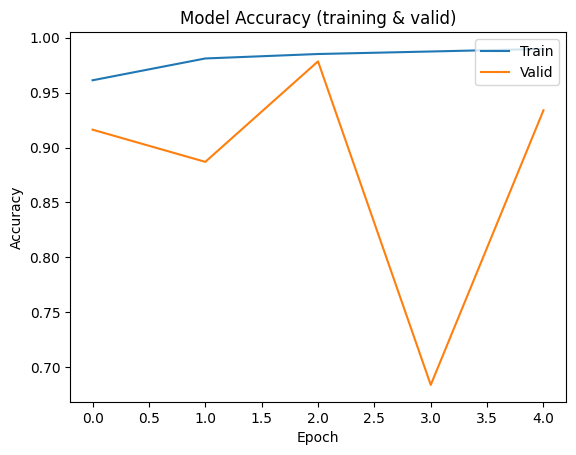

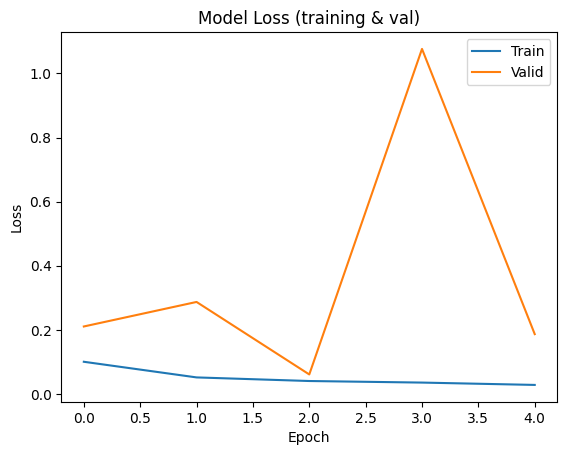

In [31]:
plt.plot(history_ft.history['accuracy'])
plt.plot(history_ft.history['val_accuracy'])
plt.title('Model Accuracy (training & valid)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()


plt.plot(history_ft.history['loss'])
plt.plot(history_ft.history['val_loss'])
plt.title('Model Loss (training & val)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()

In [32]:
# Evaluate the model on the test set
test_loss, test_acc = model_ft.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 75s 238ms/step - loss: 0.1806 - accuracy: 0.9342
Test Loss: 0.18061219155788422
Test Accuracy: 0.9341999888420105


In [38]:
model = get_model(input_shape)

# Restore the weights
#/content/drive/My Drive/my_modelCNN.h5
model.load_weights('/content/drive/My Drive/my_modelCNN.h5')

In [34]:
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

Test Loss: 0.18061219155788422
Test Accuracy: 0.9341999888420105


1/1 [==============================] - 2s 2s/step


Text(0.5, 1.0, 'This image is 0.20% Fake and 99.80% Real.')

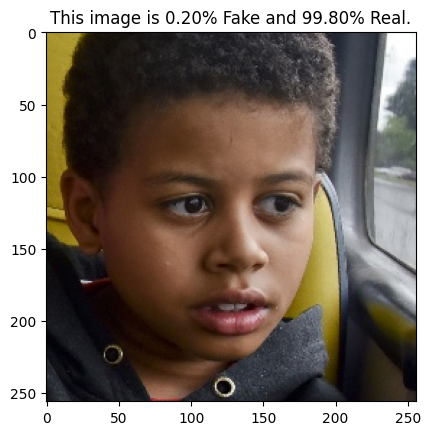

In [39]:
#real example
test_image = tf.keras.preprocessing.image.load_img('/real_vs_fake/real-vs-fake/test/real/00343.jpg', target_size=(256, 256, 3))
plt.imshow(test_image)


test_image_arr = tf.keras.preprocessing.image.img_to_array(test_image)
test_image_arr = np.expand_dims(test_image, axis=0)
test_image_arr = test_image_arr/255.


result = model.predict(test_image_arr)

plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")

In [40]:
true_labels = test_ds.classes


1/1 [==============================] - 0s 45ms/step


Text(0.5, 1.0, 'This image is 21.45% Fake and 78.55% Real.')

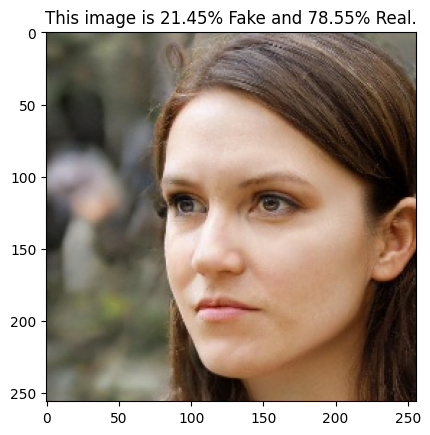

In [41]:
test_image = tf.keras.preprocessing.image.load_img('/real_vs_fake/real-vs-fake/test/fake/00V5CZZSSO.jpg', target_size=(256, 256, 3))
plt.imshow(test_image)

#fake example
test_image_arr = tf.keras.preprocessing.image.img_to_array(test_image)
test_image_arr = np.expand_dims(test_image, axis=0)
test_image_arr = test_image_arr/255.


result = model.predict(test_image_arr)

plt.title(f"This image is {100 * (1 - result[0][0]):.2f}% Fake and {100 * result[0][0]:.2f}% Real.")


In [42]:
predicted_labels = model.predict(test_ds)


313/313 [==============================] - 79s 243ms/step


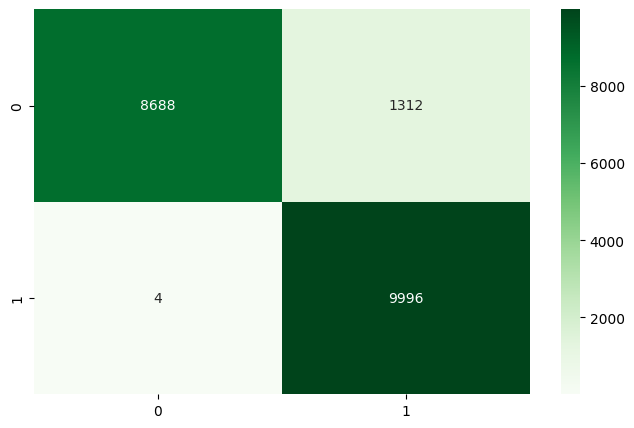

In [43]:
plt.figure(figsize = (8,5))
sns.heatmap(metrics.confusion_matrix(true_labels, predicted_labels.round()), annot = True,fmt="d",cmap = "Greens")
plt.show()

In [44]:
metrics.accuracy_score(true_labels, predicted_labels.round())


0.9342

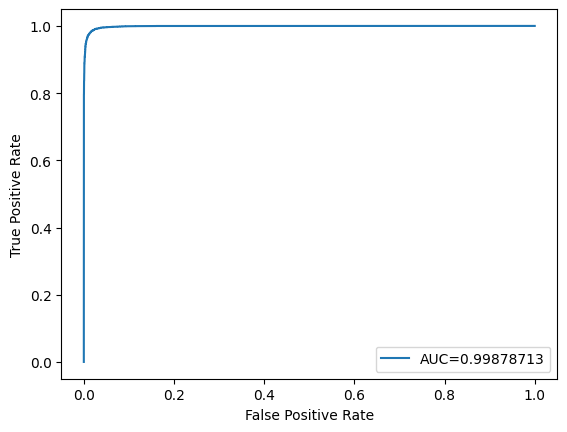

In [45]:
fpr, tpr, _ = metrics.roc_curve(true_labels,  predicted_labels)
auc = metrics.roc_auc_score(true_labels, predicted_labels)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [46]:
# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import keras

In [47]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [48]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.5):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

In [49]:
# Get the names of all layers in the model.
for idx in range(len(model.layers)):
  print(model.get_layer(index = idx).name)

input_5
zero_padding2d_8
conv1/conv
conv1/bn
conv1/relu
zero_padding2d_9
pool1
conv2_block1_0_bn
conv2_block1_0_relu
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_concat
conv2_block2_0_bn
conv2_block2_0_relu
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_concat
conv2_block3_0_bn
conv2_block3_0_relu
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_concat
conv2_block4_0_bn
conv2_block4_0_relu
conv2_block4_1_conv
conv2_block4_1_bn
conv2_block4_1_relu
conv2_block4_2_conv
conv2_block4_concat
conv2_block5_0_bn
conv2_block5_0_relu
conv2_block5_1_conv
conv2_block5_1_bn
conv2_block5_1_relu
conv2_block5_2_conv
conv2_block5_concat
conv2_block6_0_bn
conv2_block6_0_relu
conv2_block6_1_conv
conv2_block6_1_bn
conv2_block6_1_relu
conv2_block6_2_conv
conv2_block6_concat
pool2_bn
pool2_relu
pool2_conv
pool2_pool
conv3_block1_0_bn
conv3_block1_0_relu
conv3_block1_1_conv
conv3

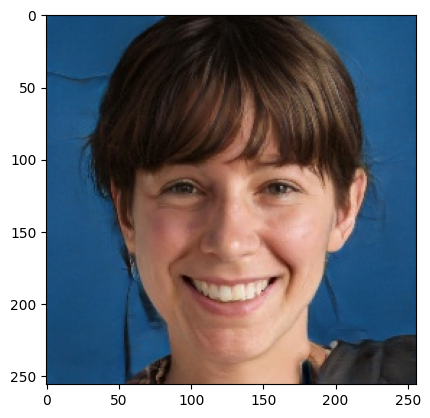

In [51]:
img_size = (256, 256)


last_conv_layer_name = "conv5_block16_1_conv"

img_path = '/content/02NUKFGPSJ.jpg'

test_image = tf.keras.preprocessing.image.load_img(img_path, target_size=(256, 256, 3))
plt.imshow(test_image)

img = tf.keras.preprocessing.image.img_to_array(test_image)
img = np.expand_dims(img, axis=0)
img = img/255.

1/1 [==============================] - 0s 29ms/step
Predicted: [[0.4324015]]


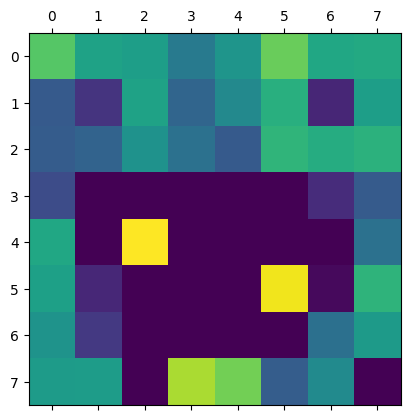

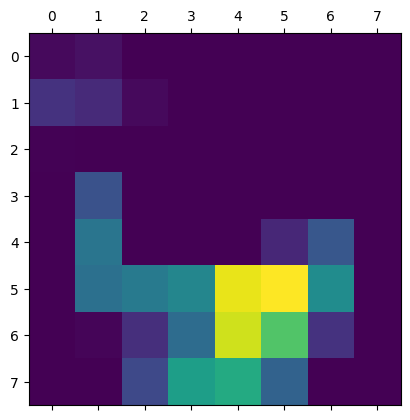

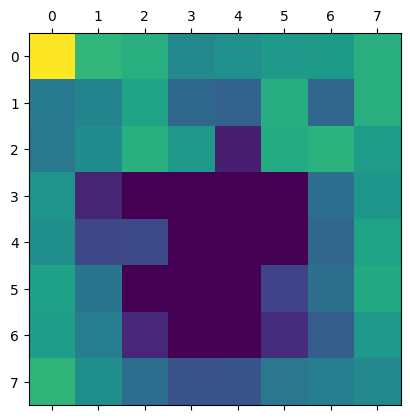

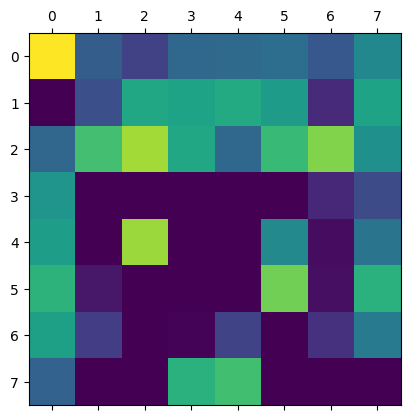

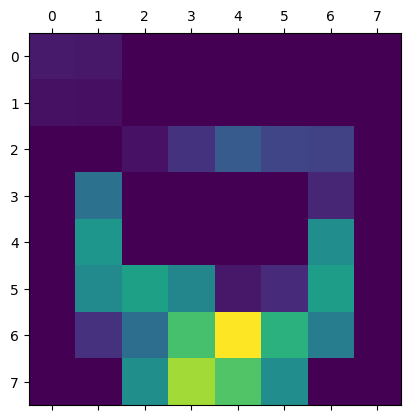

In [52]:
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img)
print("Predicted:", preds)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img, model, "conv5_block16_1_conv")
heatmap_2 = make_gradcam_heatmap(img, model, "conv5_block16_2_conv")
heatmap_3 = make_gradcam_heatmap(img, model, "conv5_block15_1_conv")
heatmap_4 = make_gradcam_heatmap(img, model, "conv5_block14_1_conv")
heatmap_5 = make_gradcam_heatmap(img, model, "conv5_block13_2_conv")

# Display heatmap
plt.matshow(heatmap)
plt.matshow(heatmap_2)
plt.matshow(heatmap_3)
plt.matshow(heatmap_4)
plt.matshow(heatmap_5)
plt.show()

<ipython-input-48-10cb15bf560a>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = cm.get_cmap("jet")


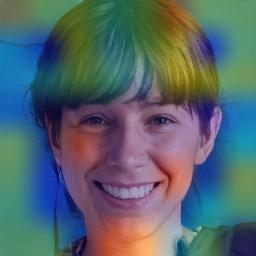

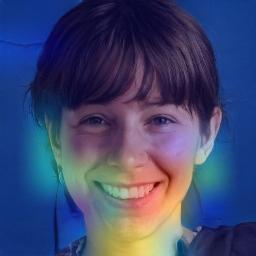

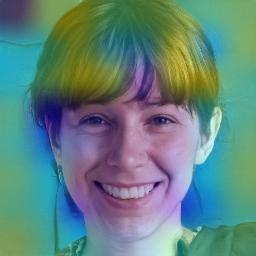

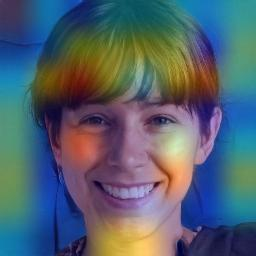

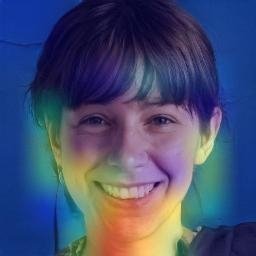

In [53]:
save_and_display_gradcam(img_path, heatmap)
save_and_display_gradcam(img_path, heatmap_2)
save_and_display_gradcam(img_path, heatmap_3)
save_and_display_gradcam(img_path, heatmap_4)
save_and_display_gradcam(img_path, heatmap_5)

In [54]:
#create the model's architecture and compile it
def get_xcp_model(input_shape):

    input = tf.keras.Input(shape=input_shape)

    xception = tf.keras.applications.Xception( weights="imagenet", include_top=False, input_tensor = input)

    x = tf.keras.layers.GlobalAveragePooling2D()(xception.output)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(x) #binary classification

    model = tf.keras.Model(xception.input, output)

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    return model

83683744/83683744 [==============================] - 4s 0us/step


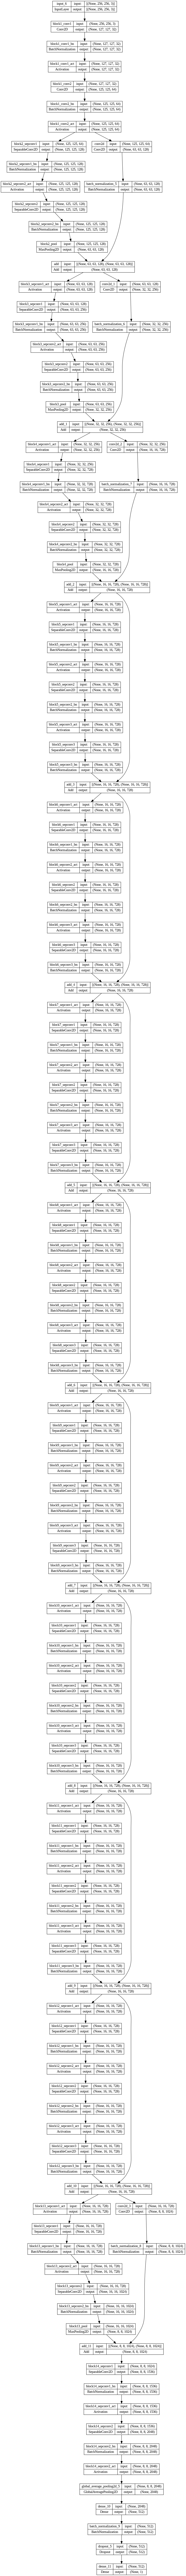

In [55]:
xcp_model = get_xcp_model(input_shape)

tf.keras.utils.plot_model(xcp_model, show_shapes=True)

In [56]:
checkpoint_filepath_xcp = "model_xcp.h5"

checkpoint_xcp = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath_xcp,
    save_weights_only=True,
    monitor='val_loss',
    mode='min', #minimize the loss value
    save_best_only=True)

early_stopping_xcp = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                     patience=5,
                                                     restore_best_weights=True,
                                                    )

reduce_lr_xcp = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.2,
                                                 patience=3)

In [57]:
history_ft = model_ft.fit(train_ds,
                       epochs = 5,
                       validation_data = valid_ds,
                       callbacks=[checkpoint_xcp, early_stopping_xcp, reduce_lr_xcp])

Epoch 1/5
1563/1563 [==============================] - 1392s 891ms/step - loss: 0.0253 - accuracy: 0.9909 - val_loss: 0.3295 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 2/5
1563/1563 [==============================] - 1392s 891ms/step - loss: 0.0222 - accuracy: 0.9918 - val_loss: 0.5560 - val_accuracy: 0.8346 - lr: 0.0010
Epoch 3/5
1563/1563 [==============================] - 1380s 883ms/step - loss: 0.0197 - accuracy: 0.9930 - val_loss: 1.0366 - val_accuracy: 0.7205 - lr: 0.0010
Epoch 4/5
1563/1563 [==============================] - 1380s 883ms/step - loss: 0.0170 - accuracy: 0.9939 - val_loss: 0.5137 - val_accuracy: 0.8199 - lr: 0.0010
Epoch 5/5
1563/1563 [==============================] - 1381s 884ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0065 - val_accuracy: 0.9980 - lr: 2.0000e-04


In [58]:
model_ft.save("/content/drive/My Drive/my_modelCNNlast.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
pip install lime


  Using cached lime-0.2.0.1.tar.gz (275 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283846 sha256=1782e4274b7c97fd680e3c711fa16894ed1148e2f58b3b6d39897d79f06ca1fd
  Stored in directory: c:\users\akile\appdata\local\pip\cache\wheels\85\fa\a3\9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from keras.models import load_model

# Load the saved model
model = load_model("my_modelCNNlast.h5")


In [4]:
import numpy as np
from keras.preprocessing import image

def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(256, 256))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image
    return img


In [5]:
from lime.lime_image import LimeImageExplainer

# Define the explainer
explainer = LimeImageExplainer()

# Define a function that takes an image and returns the model's prediction
def predict_function(images):
    # Preprocess the image and make a prediction
    preprocessed_image = preprocess_image(images)
    prediction = model.predict(preprocessed_image)
    return prediction

# Choose an image you want to explain
image_path = '02NUKFGPSJ.jpg'  # Replace with the path to your image

# Generate an explanation for the chosen image
explanation = explainer.explain_instance(image_path, predict_function, top_labels=1, hide_color=0, num_samples=1000)

# Show the explanation
explanation.show_in_notebook()


AttributeError: 'str' object has no attribute 'shape'

In [12]:
from lime.lime_image import LimeImageExplainer
import numpy as np

# Define a function to preprocess images for prediction
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.convert('L')  # Convert to grayscale
    img = img.resize((256, 256))
    img = np.array(img) / 255.0  # Normalize the image
    return img

# Define a function that takes a NumPy array of an image and returns the model's prediction
def predict_function(images):
    # Preprocess the image and make a prediction
    preprocessed_image = images
    preprocessed_image = np.expand_dims(preprocessed_image, axis=-1)  # Add a channel dimension
    prediction = model.predict(preprocessed_image)
    return prediction

# Choose an image you want to explain
image_path = '02NUKFGPSJ.jpg'  # Replace with the path to your image

# Load the image and preprocess it
image = preprocess_image(image_path)

# Define the explainer
explainer = LimeImageExplainer()

# Generate an explanation for the chosen image
explanation = explainer.explain_instance(image, predict_function, top_labels=1, hide_color=0, num_samples=1000)

# Show the explanation
explanation.show_in_notebook()


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 974ms/step


AttributeError: 'ImageExplanation' object has no attribute 'show_in_notebook'

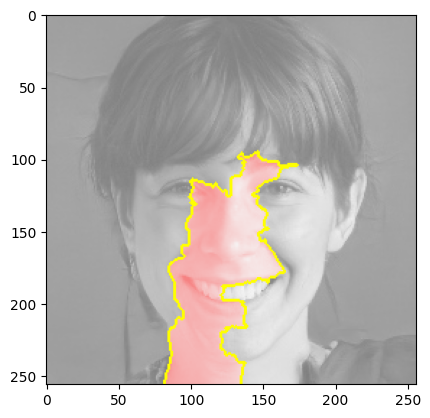

In [13]:
from lime import lime_image
from skimage.segmentation import mark_boundaries

#explanation = explainer.explain_instance(image, predict_function, top_labels=1, hide_color=0, num_samples=1000)
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()


In [14]:
pip install shap



  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/f5/fc/e81722d6bec4fcba46e46ef895eddaeab0027ac71e78fc35ef351fac5fe4/shap-0.43.0-cp311-cp311-win_amd64.whl.metadata
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
   ---------------------------------------- 0.0/447.3 kB ? eta -:--:--
   ---------- ----------------------------- 112.6/447.3 kB 2.2 MB/s eta 0:00:01
   ----------------------------- ---------- 327.7/447.3 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 447.3/447.3 kB 4.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import shap


In [16]:
explainer = shap.Explainer(model, train_ds)


NameError: name 'train_ds' is not defined

In [24]:
from PIL import Image
import os
import numpy as np

image_file = '02NUKFGPSJ.jpg'  # Path to the single image file

# Load and preprocess the single image
img = Image.open(image_file)
img = img.resize((256, 256))  # Resize to match your model's input size
img = np.array(img)  # Convert to a numpy array
img = img / 255.0  # Normalize the image

# Create a SHAP explainer
explainer = shap.Explainer(model, images)
#explanation = explainer(img, max_evals=2000)  # You can use a higher value like 2000
# Assuming you've already created the explainer
explanation = explainer.shap_values(img)

# Explain predictions for the single image
#explanation = explainer(img)

TypeError: 'list' object is not callable

In [25]:
import shap

# Assuming you've already created the explainer
explanation = explainer.shap_values(img)

# The explanation will contain SHAP values for the image


TypeError: 'list' object is not callable